In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('dataset/aqi.csv')

In [3]:
df.head()

,date,state,area,number_of_monitoring_stations,prominent_pollutants,aqi_value,air_quality_status,unit,note
0,30-04-2025,Maharashtra,Amravati,2,PM10,78,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN
1,30-04-2025,Bihar,Purnia,1,CO,56,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN
2,30-04-2025,Madhya Pradesh,Katni,1,O3,98,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN
3,30-04-2025,Chhattisgarh,Tumidih,1,PM10,103,Moderate,number_of_monitoring_stations in Absolute Numb...,NaN
4,30-04-2025,Assam,Byrnihat,1,PM2.5,61,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN


In [4]:
# Remove the note column
df.drop('note',axis=1,inplace=True)

In [5]:
veh=pd.read_csv('dataset/vahan.csv')

In [6]:
veh.head()

,year,month,state,rto,vehicle_class,fuel,value,unit,note
0,2025,April,Andaman and Nicobar Islands,All Vahan Running Office,BUS,DIESEL,2,value in Absolute Number,NaN
1,2025,April,Andaman and Nicobar Islands,All Vahan Running Office,GOODS CARRIER,DIESEL,23,value in Absolute Number,NaN
2,2025,April,Andaman and Nicobar Islands,All Vahan Running Office,GOODS CARRIER,PETROL,1,value in Absolute Number,NaN
3,2025,April,Andaman and Nicobar Islands,All Vahan Running Office,M-CYCLE/SCOOTER,ELECTRIC(BOV),1,value in Absolute Number,NaN
4,2025,April,Andaman and Nicobar Islands,All Vahan Running Office,M-CYCLE/SCOOTER,PETROL,387,value in Absolute Number,NaN


In [7]:
idsp=pd.read_csv('dataset/idsp.csv',encoding='latin')

In [8]:
def removing_outliers_from_aqi(text):
    q1=df['aqi_value'].quantile(0.25)
    q3=df['aqi_value'].quantile(0.75)
    iqr=q3-q1
    upper=q3+1.5*iqr
    lower=q1-1.5*iqr
    if text > upper:
        return upper
    elif text < lower:
        return lower
    else:
        return text

In [9]:
df['aqi_value']=df['aqi_value'].apply(removing_outliers_from_aqi)

In [10]:
df.head()

,date,state,area,number_of_monitoring_stations,prominent_pollutants,aqi_value,air_quality_status,unit
0,30-04-2025,Maharashtra,Amravati,2,PM10,78.0,Satisfactory,number_of_monitoring_stations in Absolute Numb...
1,30-04-2025,Bihar,Purnia,1,CO,56.0,Satisfactory,number_of_monitoring_stations in Absolute Numb...
2,30-04-2025,Madhya Pradesh,Katni,1,O3,98.0,Satisfactory,number_of_monitoring_stations in Absolute Numb...
3,30-04-2025,Chhattisgarh,Tumidih,1,PM10,103.0,Moderate,number_of_monitoring_stations in Absolute Numb...
4,30-04-2025,Assam,Byrnihat,1,PM2.5,61.0,Satisfactory,number_of_monitoring_stations in Absolute Numb...


<Axes: ylabel='aqi_value'>

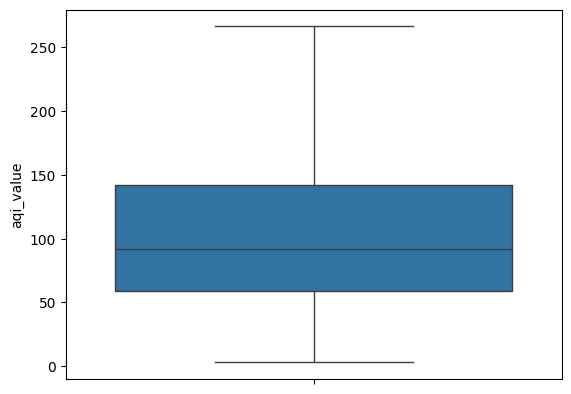

In [12]:
sns.boxplot(df['aqi_value'])

<Axes: ylabel='number_of_monitoring_stations'>

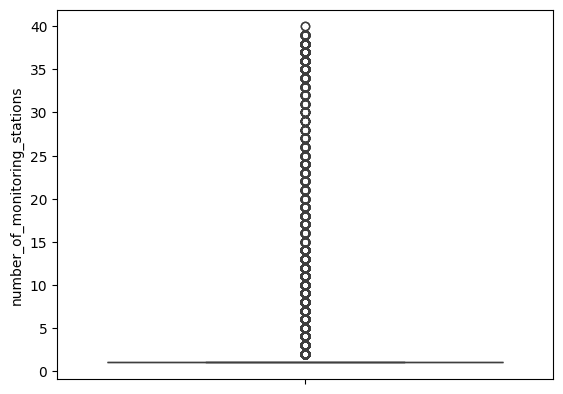

In [13]:
sns.boxplot(df['number_of_monitoring_stations'])

In [14]:
veh.head()

,year,month,state,rto,vehicle_class,fuel,value,unit,note
0,2025,April,Andaman and Nicobar Islands,All Vahan Running Office,BUS,DIESEL,2,value in Absolute Number,NaN
1,2025,April,Andaman and Nicobar Islands,All Vahan Running Office,GOODS CARRIER,DIESEL,23,value in Absolute Number,NaN
2,2025,April,Andaman and Nicobar Islands,All Vahan Running Office,GOODS CARRIER,PETROL,1,value in Absolute Number,NaN
3,2025,April,Andaman and Nicobar Islands,All Vahan Running Office,M-CYCLE/SCOOTER,ELECTRIC(BOV),1,value in Absolute Number,NaN
4,2025,April,Andaman and Nicobar Islands,All Vahan Running Office,M-CYCLE/SCOOTER,PETROL,387,value in Absolute Number,NaN


In [15]:
veh['value'].value_counts()

value
1        9879
2        4755
3        3184
4        2214
5        1756
         ... 
5054        1
48139       1
7574        1
2978        1
6928        1
Name: count, Length: 5391, dtype: int64

In [17]:
df['date']=pd.to_datetime(df['date'])

C:\Users\aky\AppData\Local\Temp\ipykernel_6940\1213281828.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date']=pd.to_datetime(df['date'])


In [18]:
df['Month']=df['date'].dt.month_name()

In [19]:
df['Day']=df['date'].dt.day_name().apply(lambda x: 'Weekend' if x in ['Sunday','Saturday'] else 'Weekday')

In [22]:
idsp=pd.read_csv('dataset/idsp.csv',encoding='latin')

In [23]:
idsp.head()

,year,week,outbreak_starting_date,reporting_date,state,district,disease_illness_name,status,cases,deaths,unit,note
0,2025,16,15-04-2025,15-04-2025,Andhra Pradesh,Kakinada,Acute Diarrheal Disease,Reported,22,0,"cases in absolute number, deaths in absolute n...",NaN
1,2025,16,15-04-2025,17-04-2025,Assam,Biswanath,Chickenpox,Reported,1,1,"cases in absolute number, deaths in absolute n...",NaN
2,2025,16,19-04-2025,20-04-2025,Assam,Dhemaji,Food Poisoning,Reported,16,0,"cases in absolute number, deaths in absolute n...",NaN
3,2025,16,19-04-2025,19-04-2025,Bihar,Gopalganj,Fever with Rash,Reported,5,0,"cases in absolute number, deaths in absolute n...",NaN
4,2025,16,12-04-2025,15-04-2025,Bihar,Madhubani,Acute Diarrheal Disease,Reported,21,0,"cases in absolute number, deaths in absolute n...",NaN


In [24]:
idsp['week'].value_counts()

week
30    208
28    177
34    173
42    162
22    162
35    161
32    161
26    160
33    155
29    153
31    152
25    145
16    143
37    139
38    138
27    136
11    136
36    134
21    133
23    130
24    130
15    129
9     128
8     128
18    126
5     126
20    121
17    121
47    118
12    118
40    115
19    114
7     114
14    112
13    112
6     108
10    108
39    108
45    103
44    101
41    101
43    100
46    100
51     99
48     95
4      93
50     91
1      86
2      81
52     80
3      79
49     71
Name: count, dtype: int64

In [25]:
idsp['cases'].value_counts()

cases
1      344
5      277
10     230
6      228
12     219
      ... 
265      1
496      1
251      1
186      1
253      1
Name: count, Length: 281, dtype: int64

In [27]:
df.to_csv('dataset/df2.csv',index=False)